<a href="https://colab.research.google.com/github/sebasesto/CEIA/blob/master/VpC2/Clase_2_Tarea_3co2021_Sesto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Utilizando el dataset de señas de manos, crear una red neuronal con caracteristicas similares a las vistas en clase y entrenarla hasta obtener un accuracy de, como minimo, 85% evitando sobreentrenamiento. Aplicar las técnicas de data augmentation que consideren necesarias.

---
El dataset es un conjunto de imagenes de una mano realizando figuras de numeros del 0 al 5. El objetivo es clasificar a que digito corresponde cada imagen.

<img src="https://drive.google.com/uc?export=view&id=1Tm9arSkvypYpXzANQo4C2DtMWzkjA4hO" style="width:800px;height:300px;">

Para cargar en memoria el dataset suministrado pueden utilizar la siguiente función:


In [27]:
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_dataset():
    train_dataset = h5py.File('train_signs.h5', "r")
    train_x = np.array(train_dataset["train_set_x"][:])
    train_y = np.array(train_dataset["train_set_y"][:])

    test_dataset = h5py.File('test_signs.h5', "r")
    test_x = np.array(test_dataset["test_set_x"][:])
    test_y = np.array(test_dataset["test_set_y"][:])

    classes = np.array(test_dataset["list_classes"][:])
    
    train_y = train_y.reshape((1, train_y.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))
    
    return train_x, train_y, test_x, test_y, classes

In [28]:
# https://drive.google.com/file/d/1-VxyI9TT2k5u8grHhrJtivvIIf2A4Ujt/view?usp=sharing
!gdown --id 1-VxyI9TT2k5u8grHhrJtivvIIf2A4Ujt # Dataset copiado a mi propio drive

Downloading...
From: https://drive.google.com/uc?id=1-VxyI9TT2k5u8grHhrJtivvIIf2A4Ujt
To: /content/dataset_manos.rar
100% 7.23M/7.23M [00:00<00:00, 23.0MB/s]


In [29]:
!unrar x /content/dataset_manos.rar > /dev/null



Would you like to replace the existing file test_signs.h5
1477712 bytes, modified on 2021-11-05 21:08
with a new one
1477712 bytes, modified on 2021-11-05 21:08

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 

In [30]:
train_x, train_Y, test_x, test_Y, classes = load_dataset()

El conjunto de entrenamiento tiene 1080 imágenes
El conjunto de testeo tiene 120 imágenes
Las imágenes son de: (64, 64, 3)
Label de la imágen 0: 5
Label de la imágen 1: 0
Label de la imágen 2: 2
Label de la imágen 3: 5
Label de la imágen 4: 2
Label de la imágen 5: 4
Label de la imágen 6: 2
Label de la imágen 7: 1
Label de la imágen 8: 1


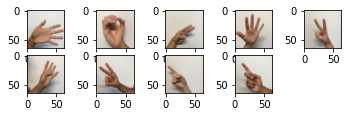

In [32]:
print("El conjunto de entrenamiento tiene {} imágenes".format(len(train_x)))
print("El conjunto de testeo tiene {} imágenes".format(len(test_x)))
print("Las imágenes son de: {}".format(train_x[0].shape))

# Ploteo algunas imagenes del dataset y sus etiquetas
for i in range(9):

  plt.subplot(551 + i)
  plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
  print("Label de la imágen {}: {}".format(i, train_Y[0, i]))

plt.show()

In [33]:
print("Dimensiones de la salida:", train_Y.shape)
print("Dimensiones de las entradas:", train_x.shape)

Dimensiones de la salida: (1, 1080)
Dimensiones de las entradas: (1080, 64, 64, 3)


Readaptamos las etiquetas para que queden en formato one-hot.

In [34]:
train_y = tf.one_hot(train_Y[0], 6)
test_y = tf.one_hot(test_Y[0], 6)
print("Dimensiones con OHE",train_y.shape)

Dimensiones con OHE (1080, 6)


Dado que las imágenes contienen pixeles con valores en el rango de 0 a 255, realizamos una normalización para llevarlas al rango 0 a 1.

Despues crear el set de validacion

In [36]:
# Definir las dimensiones para usar en el modelo:
width, height, channels = train_x[0].shape

In [37]:
valid_x = train_x[:120]
valid_y = train_y[:120]

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_x, train_y, batch_size=32)#,subset='training')
test_generator = test_datagen.flow(test_x, test_y, batch_size=32)#,subset='validation')
test_generator = valid_datagen.flow(valid_x, valid_y, batch_size=32)

Dimensiones de la salida: (1080, 6)
Dimensiones de las entradas: (1080, 64, 64, 3)
Dimensiones de la salida: (120, 6)
Dimensiones de las entradas: (120, 64, 64, 3)


In [38]:
model = tf.keras.Sequential()

#model.add(tf.keras.layers.Input(shape=(64, 64, 3)))## SHAPE DE IMAGENES
model.add(tf.keras.layers.Input(shape=(width, height, channels)))## SHAPE DE IMAGENES
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Flatten())# Convertir a vector unidimensional.
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dense(units=6, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 64)        

In [39]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),# la otra opcion es SDG
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [40]:
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=test_generator)


Epoch 1/30
34/34 [==============================] - 6s 155ms/step - loss: 1.7994 - categorical_accuracy: 0.2083 - val_loss: 1.6758 - val_categorical_accuracy: 0.3667
Epoch 2/30
34/34 [==============================] - 5s 153ms/step - loss: 1.4579 - categorical_accuracy: 0.4380 - val_loss: 1.0950 - val_categorical_accuracy: 0.6167
Epoch 3/30
34/34 [==============================] - 5s 153ms/step - loss: 0.9466 - categorical_accuracy: 0.6296 - val_loss: 0.6588 - val_categorical_accuracy: 0.7917
Epoch 4/30
34/34 [==============================] - 5s 154ms/step - loss: 0.6762 - categorical_accuracy: 0.7611 - val_loss: 0.5258 - val_categorical_accuracy: 0.8167
Epoch 5/30
34/34 [==============================] - 5s 153ms/step - loss: 0.4633 - categorical_accuracy: 0.8389 - val_loss: 0.4869 - val_categorical_accuracy: 0.8250
Epoch 6/30
34/34 [==============================] - 5s 153ms/step - loss: 0.3945 - categorical_accuracy: 0.8630 - val_loss: 0.3074 - val_categorical_accuracy: 0.8750
Epoc

## Visualización de los resultados

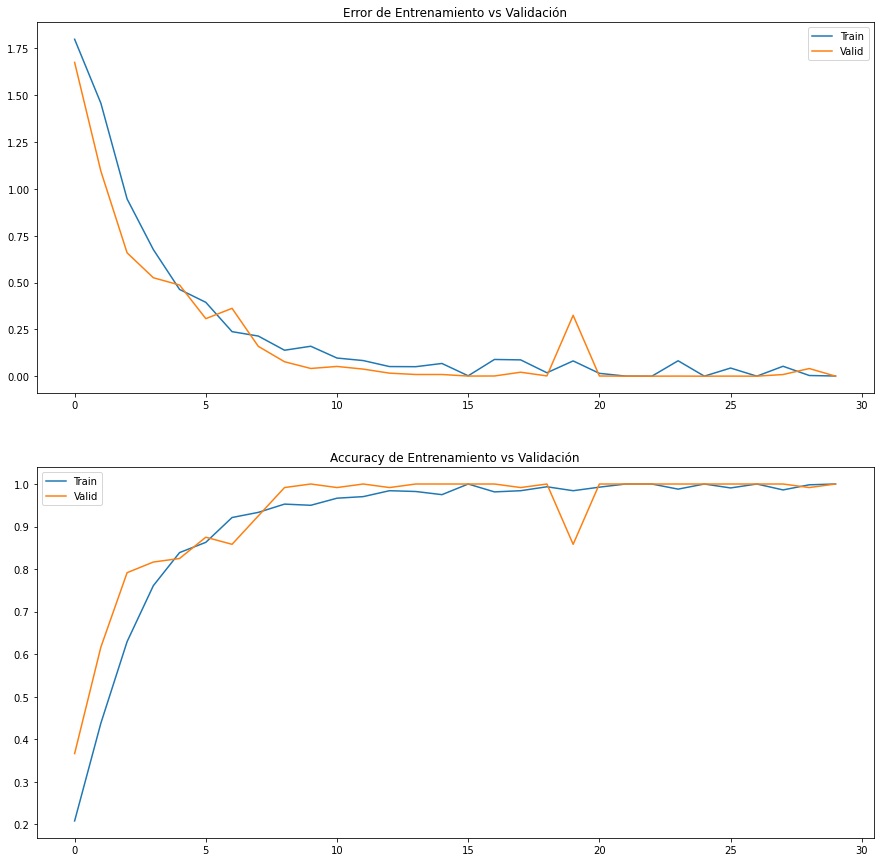

In [41]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss']) 
axs[0].plot(history.history['val_loss']) 
axs[0].title.set_text('Error de Entrenamiento vs Validación') 
axs[0].legend(['Train', 'Valid'])  

axs[1].plot(history.history['categorical_accuracy']) 
axs[1].plot(history.history['val_categorical_accuracy']) 
axs[1].title.set_text('Accuracy de Entrenamiento vs Validación') 
axs[1].legend(['Train', 'Valid'])

## Evaluación del modelo

Una vez entrenado el modelo, podemos evaluarlo con el conjunto de test mediante la funcion `evaluate`.

In [42]:
results = model.evaluate(valid_x, valid_y)

print("El modelo logro un error de {} y una accuracy de {}".format(results[0], results[1]))

4/4 [==============================] - 0s 42ms/step - loss: 0.5406 - categorical_accuracy: 0.9917
El modelo logro un error de 0.5405741333961487 y una accuracy de 0.9916666746139526
